# 합성곱 신경망의 구성요소


## 합성곱
: 입력 데이터의 유용한 특성만 드러나게 하는 것
- 일부에 가중치 곱
- 가중치 w1 ~ w3이 입력의 처음 3개 특성과 곱하고 + 절편 출력1 -> 같은 가중치로 두번째~네번째 특성과 곱하고 + 같은 절편 출력 2 -> ...
- 가중치 개수도 하이퍼파라미터
- 합성곱에서 뉴런 = 필터 = 커널
- 2차원에도 적용가능
- 특성 맵 : 합성곱 계산을 통해 얻은 출력
ex) (4,4) 크기의 입력 & 커널 크기(3,3) => (2,2) 특성 맵
- 커널 크기는 (3,3), (5,5) 권장

## 케라스 합성곱 층

from tensorflow import keras

keras.layers.Conv2D(10, kernel_size(3,3), activation='relu')

### 패딩
- 합성곱 계산의 출력 크기가 처음 합성곱과 같게 만들기 위해 처음의 입력을 더 큰 입력으로 만들어줌
- 입력 배열의 주위를 가사의 원소로 채움...0으로..?
- => 세임 패딩 : padding='same'(기본은 valid)
- 밸리드 패딩 : 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우
- 모서리에 있어 적게 포함되는 정보들을 잃어버리지 않도록 하기 위해서 사용

keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same'
### 스트라이드
- 이동의 크기 , strides=, 기본은 1

### 풀링
- 특성 맵의 가로세로 크기를 줄이는 역할, 특성 맵의 개수는 줄이지 않음
ex) (2,2,3) --> (1,1,3)
- 최대 풀링, 평균 풀링

keras.layers.MaxPooling2D(풀링의 크기) 

keras.layers.MaxPooling(2, strides=2, padding='same')

keras.layers.AveragePooling2D( ... )

---
p427 ~ 440 합성곱 신경망의 전체 과정

너비와 높이는 줄어들고 깊이는 깊어지게


In [1]:
from tensorflow import keras

keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

# 합성곱 신경망을 사용한 이미지 분류

In [2]:
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # 3차원을 4차원으로
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) # 층을 하나씩 추가
#model.add(keras.layers.Conv2D(필터개수=32, 커널 크기=(3,3), 렐루함수, 세임 패딩)

In [4]:
model.add(keras.layers.MaxPooling2D(2)) # 풀링 층 추가 --> 절반&층32개 = (14,14,32)

In [5]:
# 두 번째 합성곱-풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')) # 필터 개수 64
model.add(keras.layers.MaxPooling2D(2)) # (7,7,64)

In [6]:
# 최종 특성 맵을 일렬로 펼쳐 출력층 계산
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu')) # 은닉층
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

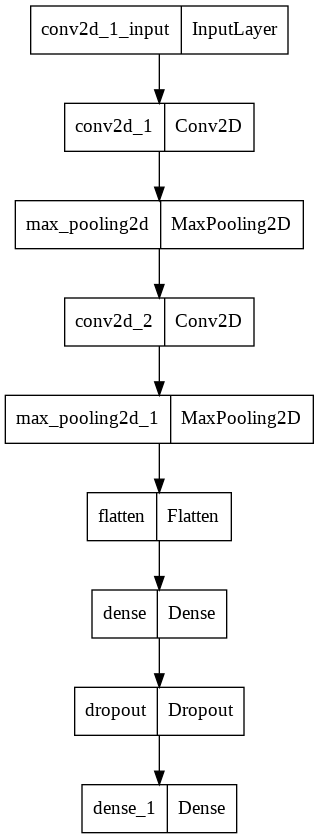

In [8]:
keras.utils.plot_model(model)

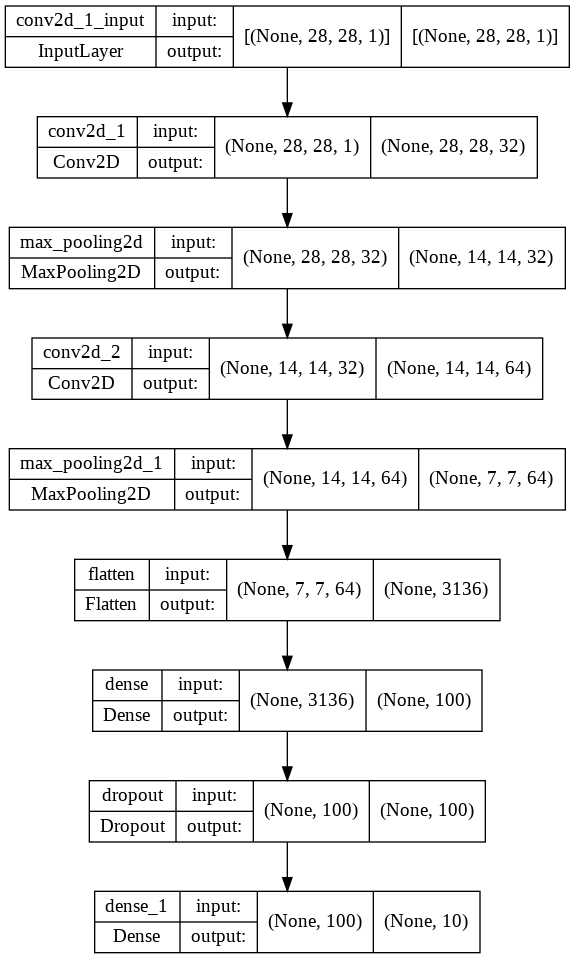

In [9]:
keras.utils.plot_model(model, show_shapes=True) # show_shape=True : 입력과 출력의 크기 표시, to_file=파일이름 : 파일이름으로 이미지 저장

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 27s 9ms/step - loss: 0.5431 - accuracy: 0.8052 - val_loss: 0.3432 - val_accuracy: 0.8737
Epoch 2/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3624 - accuracy: 0.8707 - val_loss: 0.2978 - val_accuracy: 0.8841
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3083 - accuracy: 0.8907 - val_loss: 0.2626 - val_accuracy: 0.9001
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2762 - accuracy: 0.9008 - val_loss: 0.2475 - val_accuracy: 0.9063
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2508 - accuracy: 0.9086 - val_loss: 0.2417 - val_accuracy: 0.9080
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2306 - accuracy: 0.9156 - val_loss: 0.2423 - val_accuracy: 0.9131
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2129 - accuracy: 0.9218 - val_loss: 0.2280 - val_ac

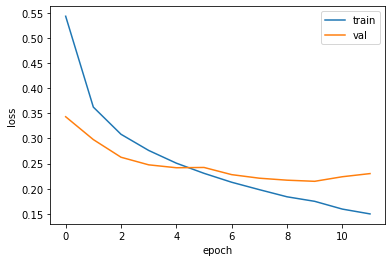

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2148 - accuracy: 0.9210


[0.21475307643413544, 0.9210000038146973]

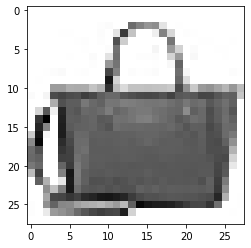

In [13]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [14]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[2.85156950e-17 1.33480854e-30 9.16510906e-24 8.00218382e-25
  4.33440117e-22 6.51977943e-21 6.27083037e-19 7.59886291e-25
  1.00000000e+00 1.23082146e-26]]


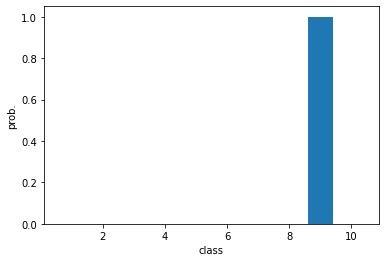

In [15]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']

In [17]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [18]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [19]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2388 - accuracy: 0.9157


[0.23876681923866272, 0.9157000184059143]

# 합성곱 신경망의 시각화

## 가중치 시각화

In [20]:
model = keras.models.load_model('best-cnn-model.h5')

In [21]:
model.layers

In [22]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [23]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.0088698035 0.24237148


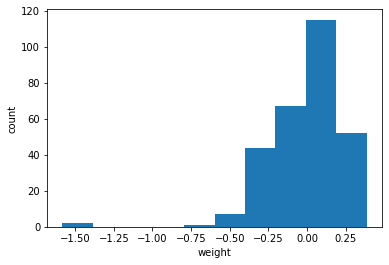

In [25]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

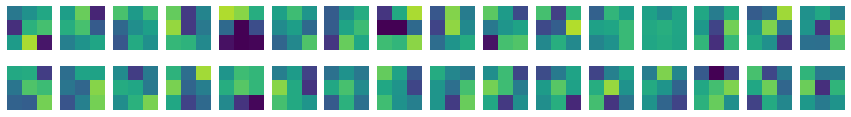

In [27]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) # imshow() : 배열의 최댓값과 최솟값을 사용해 픽셀의 강도 표현
    axs[i,j].axis('off')
plt.show()

In [29]:
no_training_model = keras.Sequential() # 훈련하지 않은 합성곱 신경망 생성
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [30]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [31]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0016715756 0.08032191


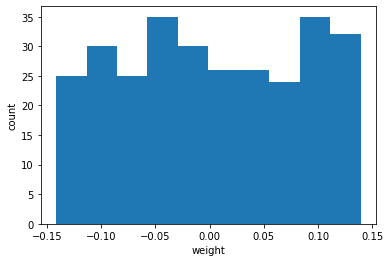

In [32]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

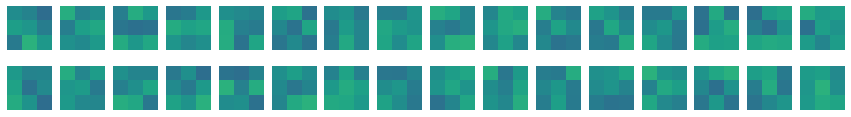

In [33]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

### 함수형 API

dense1 = keras.layers.Dense(100, activation='sigmoid')

dense2 = keras.layers.Dense(10, activation='softmax')

inputs = keras.Input(shape=(784,))

hidden = dense1(inputs) | outputs = dense2(hidden) --> 두번째 층 호출, 첫 번째 층의 출력을 입력으로 사용

model = keras.Model(inputs, outputs) --> input과 output 연결

---


In [34]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_1_input'), name='conv2d_1_input', description="created by layer 'conv2d_1_input'")


In [35]:
conv_acti = keras.Model(model.input, model.layers[0].output)

### 특성맵 시각화

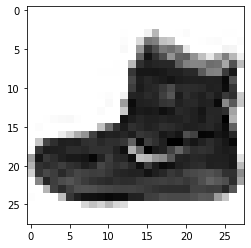

In [38]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [39]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [40]:
print(feature_maps.shape)

(1, 28, 28, 32)


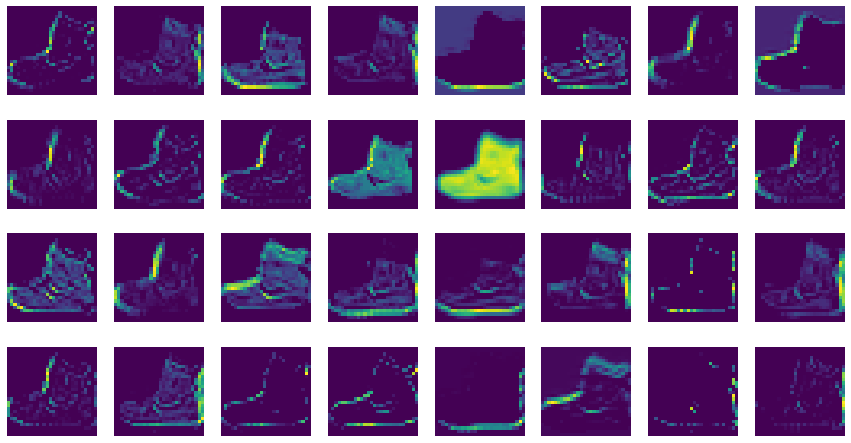

In [41]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()

In [42]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [43]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [44]:
print(feature_maps.shape)

(1, 14, 14, 64)


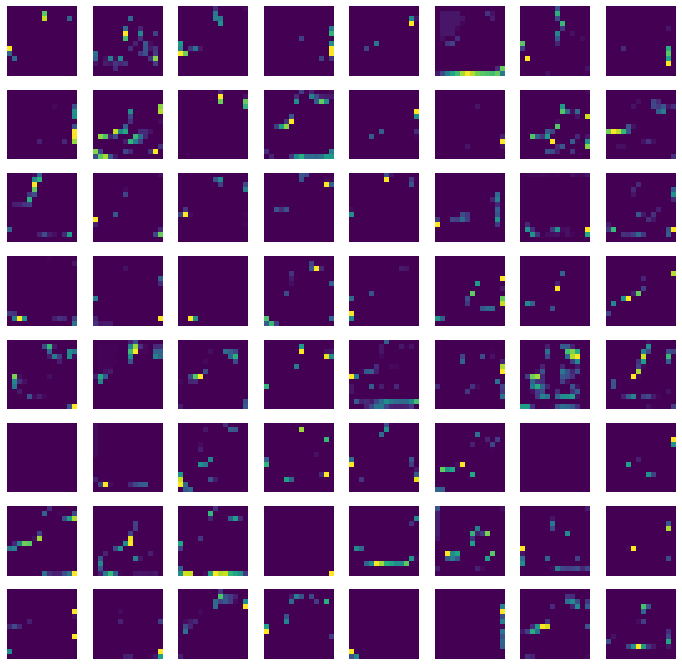

In [46]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()